In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start ='2013-01-01'
end ='2023-11-11'

stock='MRF.NS'
data= yf.download(stock , start , end) 

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,12927.000000,13380.000000,12879.849609,13243.250000,13031.441406,20619
1,2013-01-02,13312.400391,13435.000000,13256.000000,13316.200195,13103.221680,12217
2,2013-01-03,13351.000000,13365.950195,13124.150391,13279.099609,13066.714844,10213
3,2013-01-04,13240.000000,13418.400391,13221.299805,13361.099609,13147.405273,7307
4,2013-01-07,13375.000000,13439.950195,13265.000000,13288.799805,13076.262695,7509
...,...,...,...,...,...,...,...
2676,2023-11-06,108895.000000,108895.000000,107103.203125,107391.851562,107388.929688,7716
2677,2023-11-07,108000.000000,108000.000000,107008.046875,107185.398438,107182.484375,4702
2678,2023-11-08,107830.000000,108700.000000,107330.101562,108348.101562,108345.156250,5787
2679,2023-11-09,108325.500000,109108.953125,107774.398438,108078.203125,108075.265625,5103


In [4]:
ma_100_days=data.Close.rolling(100).mean()

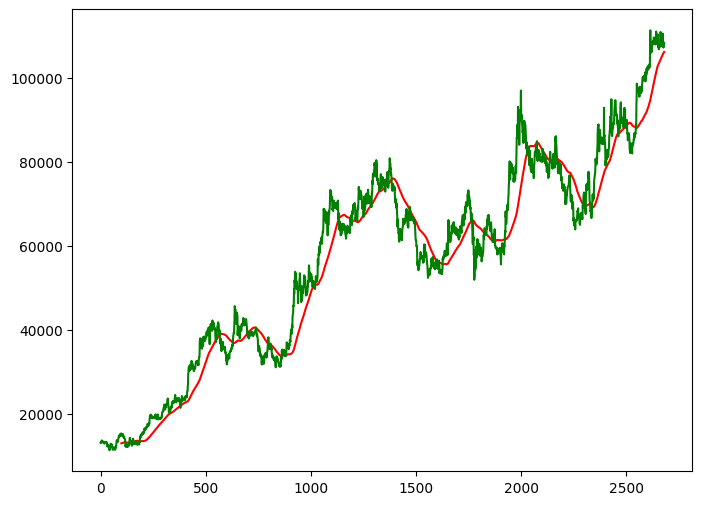

In [16]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [5]:
ma_200_days=data.Close.rolling(200).mean()

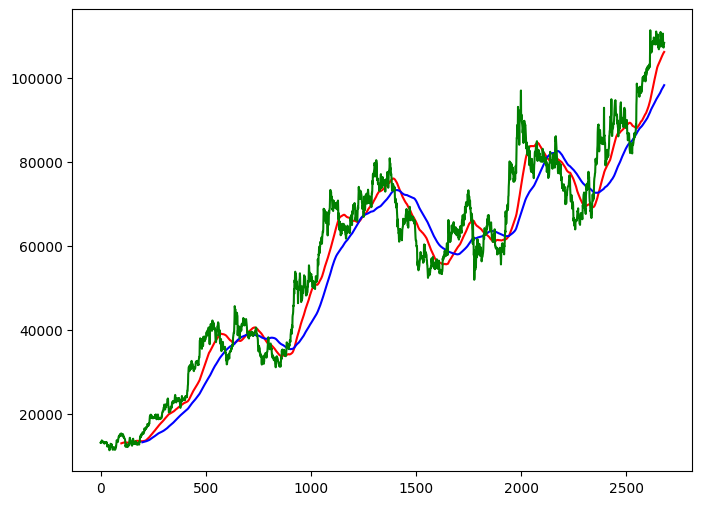

In [18]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [6]:
data.dropna(inplace=True)

In [7]:
data_train=pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80) : len(data)])

In [8]:
data_train.shape[0]

2144

In [9]:
data_test.shape[0]

537

In [10]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler(feature_range=(0,1))

In [11]:
data_train_scale=scaler.fit_transform(data_train)

In [12]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [13]:
x,y = np.array(x), np.array(y)

In [14]:
from keras.layers import Dense , Dropout ,LSTM
from keras.models import Sequential

In [15]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))


In [16]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [17]:
model.fit(x,y,epochs=50,batch_size=32 , verbose =1)

Epoch 1/50
64/64 [==============================] - 13s 120ms/step - loss: 0.0449
Epoch 2/50
64/64 [==============================] - 8s 119ms/step - loss: 0.0095
Epoch 3/50
64/64 [==============================] - 8s 120ms/step - loss: 0.0078
Epoch 4/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0074
Epoch 5/50
64/64 [==============================] - 8s 120ms/step - loss: 0.0069
Epoch 6/50
64/64 [==============================] - 8s 123ms/step - loss: 0.0067
Epoch 7/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0066
Epoch 8/50
64/64 [==============================] - 8s 120ms/step - loss: 0.0067
Epoch 9/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0056
Epoch 10/50
64/64 [==============================] - 8s 121ms/step - loss: 0.0050
Epoch 11/50
64/64 [==============================] - 8s 122ms/step - loss: 0.0052
Epoch 12/50
64/64 [==============================] - 8s 123ms/step - loss: 0.0051
Epoch 13/50
64/64 [=====

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
pas_100_days=data_train.tail(100)

In [20]:
data_test=pd.concat([pas_100_days,data_test],ignore_index=True)

In [21]:
data_test_scale = scaler. fit_transform(data_test)

In [22]:
x=[]
y=[]
for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x,y = np.array(x), np.array(y)

In [23]:
y_predict =model .predict(x)

17/17 [==============================] - 1s 37ms/step


In [24]:
scale =1/scaler.scale_ 

In [25]:
y_predict = y_predict * scale

In [26]:
y = y*scale

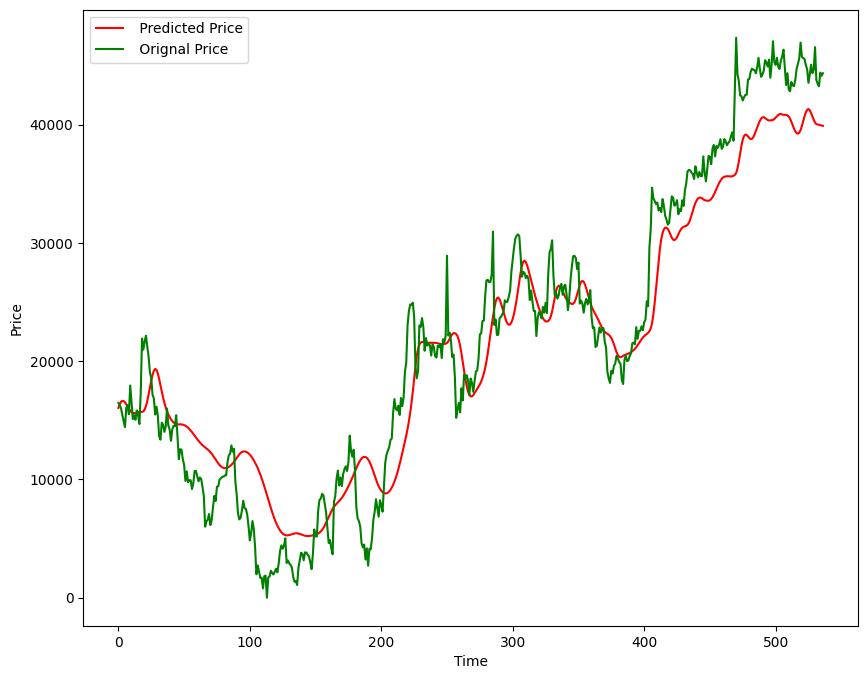

In [27]:
plt.figure(figsize=(10,8))
plt.plot(y_predict ,'r',label=' Predicted Price')
plt.plot(y ,'g',label=' Orignal Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()